In [74]:
from RaceMultiOutputModelRandomized import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
MODELS_PATH = 'models/RaceModels/'

In [9]:
data_path = 'data/RaceMultiOutputModelRandomized/categorical/position/Laps0to10/'
# Load data
X_train = pd.read_csv(f'{data_path}3copies_X_train.csv')
y_train = pd.read_csv(f'{data_path}3copies_y_train.csv')
X_valid = pd.read_csv(f'{data_path}3copies_X_valid.csv')
y_valid = pd.read_csv(f'{data_path}3copies_y_valid.csv')
X_test = pd.read_csv(f'{data_path}3copies_X_test.csv')
y_test = pd.read_csv(f'{data_path}3copies_y_test.csv')

# Drop copy_id
X_train.drop(['copy_id'],axis=1, inplace=True)
y_train.drop(['copy_id'],axis=1, inplace=True)
X_valid.drop(['copy_id'],axis=1, inplace=True)
y_valid.drop(['copy_id'],axis=1, inplace=True)
X_test.drop(['copy_id'],axis=1, inplace=True)
y_test.drop(['copy_id'],axis=1, inplace=True)

# Scale data
X_train = X_train / 25
y_train = y_train / 25
X_valid = X_valid / 25
y_valid = y_valid / 25
X_test = X_test / 25
y_test = y_test / 25

# Create Dataset and DataLoader for train and test sets
train_dataset = RaceDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
valid_dataset = RaceDataset(torch.tensor(X_valid.values, dtype=torch.float32), torch.tensor(y_valid.values, dtype=torch.float32))
test_dataset = RaceDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## cat_pos_3copies_0to10_twolayers_mse

New model created


Epoch 1/100 - Train Acc: 0.04 | Val Acc: 0.07:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 100/100 - Train Acc: 0.37 | Val Acc: 0.37: 100%|██████████| 100/100 [00:03<00:00, 29.51epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.209719,0.122261,0.036765,0.071895
1,2,0.111274,0.105749,0.074346,0.058824
2,3,0.098457,0.097393,0.058824,0.104575
3,4,0.090837,0.091233,0.125000,0.130719
4,5,0.085968,0.087532,0.162582,0.163399
...,...,...,...,...,...
95,96,0.058473,0.065555,0.379902,0.352941
96,97,0.058467,0.065548,0.375000,0.366013
97,98,0.058453,0.065708,0.372549,0.366013
98,99,0.058337,0.065773,0.365196,0.379085


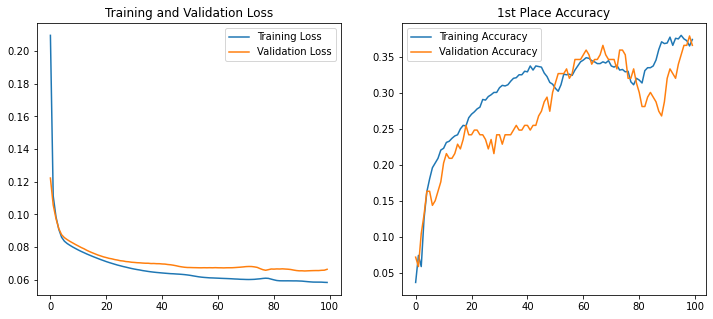

In [24]:
model_path = MODELS_PATH + 'cat_pos_3copies_0to10_twolayers_mse/'
model = TwoLayers()
criterion = nn.MSELoss()
lr = 0.001

load = False
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=100, load=load, lr=lr, viz=True)

Training Progress:  50%|█████     | 100/200 [00:00<?, ?epoch/s]

Epoch 200/200 - Train Acc: 0.36 | Val Acc: 0.34: 100%|██████████| 200/200 [00:03<00:00, 30.43epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.209719,0.122261,0.036765,0.071895
1,2,0.111274,0.105749,0.074346,0.058824
2,3,0.098457,0.097393,0.058824,0.104575
3,4,0.090837,0.091233,0.125000,0.130719
4,5,0.085968,0.087532,0.162582,0.163399
...,...,...,...,...,...
195,196,0.053102,0.067491,0.363562,0.346405
196,197,0.053038,0.067550,0.363562,0.346405
197,198,0.052964,0.067602,0.368464,0.339869
198,199,0.052915,0.067633,0.374183,0.346405


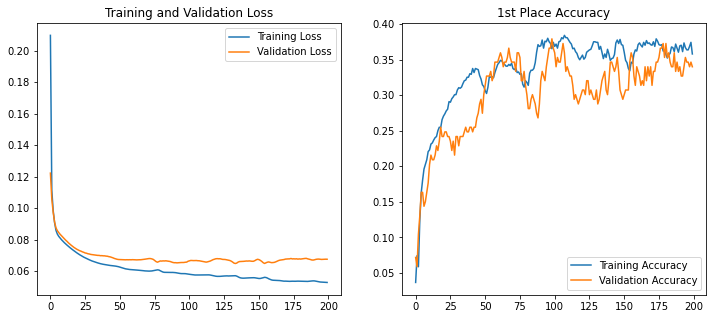

In [25]:
load = True
epochs = 100
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## cat_pos_3copies_0to10_threelayers_mse

New model created


Epoch 1/100 - Train Acc: 0.04 | Val Acc: 0.04:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 100/100 - Train Acc: 0.25 | Val Acc: 0.17: 100%|██████████| 100/100 [00:03<00:00, 27.50epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.329320,0.240442,0.044118,0.039216
1,2,0.190124,0.151667,0.078431,0.019608
2,3,0.130088,0.119226,0.058824,0.032680
3,4,0.111455,0.114350,0.083333,0.045752
4,5,0.107681,0.113289,0.084967,0.052288
...,...,...,...,...,...
95,96,0.076150,0.077446,0.263889,0.196078
96,97,0.075999,0.077473,0.262255,0.196078
97,98,0.075701,0.077692,0.258987,0.183007
98,99,0.075378,0.077874,0.254085,0.176471


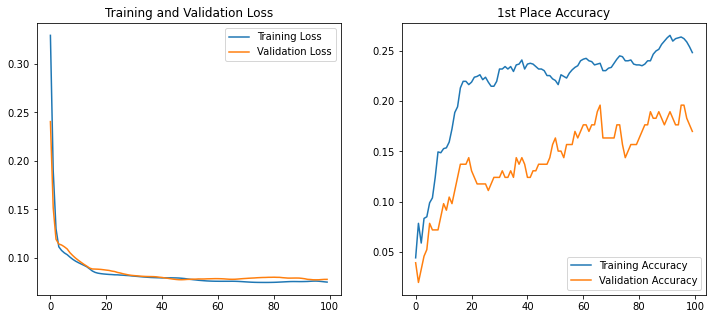

In [26]:
model_path = MODELS_PATH + 'cat_pos_3copies_0to10_theelayers_mse/'
model = ThreeLayers()
criterion = nn.MSELoss()
lr = 0.001

load = False
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=100, load=load, lr=lr, viz=True)

Training Progress:  80%|████████  | 400/500 [00:00<?, ?epoch/s]

Epoch 500/500 - Train Acc: 0.31 | Val Acc: 0.20: 100%|██████████| 500/500 [00:03<00:00, 27.91epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.329320,0.240442,0.044118,0.039216
1,2,0.190124,0.151667,0.078431,0.019608
2,3,0.130088,0.119226,0.058824,0.032680
3,4,0.111455,0.114350,0.083333,0.045752
4,5,0.107681,0.113289,0.084967,0.052288
...,...,...,...,...,...
495,496,0.052730,0.080337,0.310458,0.176471
496,497,0.052933,0.080204,0.305556,0.183007
497,498,0.053000,0.079710,0.308824,0.209150
498,499,0.053029,0.079474,0.310458,0.196078


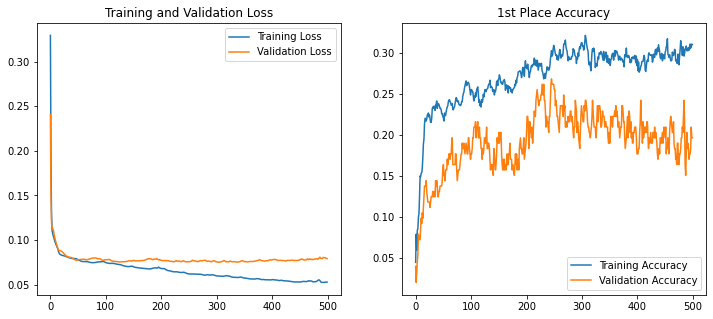

In [28]:
load = True
epochs = 100
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## cat_pos_3copies0to10_twolayers_customweightrankingloss

New model created


Training Progress:   0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch 10/10 - Train Acc: 0.19 | Val Acc: 0.12: 100%|██████████| 10/10 [18:38<00:00, 111.88s/epoch]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,1.747933,1.511849,0.043301,0.052288
1,2,1.332098,1.263234,0.049020,0.052288
2,3,1.216165,1.196003,0.056373,0.058824
3,4,1.146480,1.107960,0.057190,0.084967
4,5,1.051475,1.013959,0.080065,0.084967
5,6,0.988255,0.984764,0.122549,0.111111
6,7,0.949414,0.946747,0.155229,0.124183
7,8,0.926466,0.931925,0.172386,0.130719
8,9,0.913038,0.931063,0.174020,0.124183
9,10,0.906203,0.928549,0.189542,0.124183


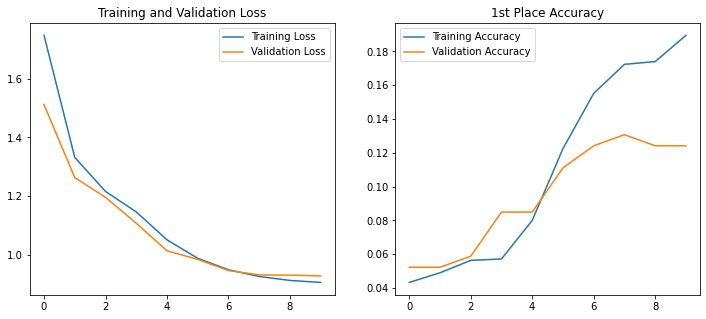

In [34]:
model_path = MODELS_PATH + 'cat_pos_3copies_0to10_customweightrankingloss/'
model = TwoLayers()
criterion = WeightedRankingLoss()
lr = 0.001

load = False
epochs = 10
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

In [98]:
model_path = MODELS_PATH + 'cat_pos_3copies_0to10_customweightrankingloss/'
model = TwoLayers()
criterion = WeightedRankingLoss()
lr = 0.001

load = True
epochs = 20
train_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  33%|███▎      | 10/30 [00:00<?, ?epoch/s]

# Binary

In [75]:
data_path = 'data/RaceMultiOutputModelRandomized/categorical/position/Laps0to10/'

by_train = np.argmin(y_train.values, axis=1)
by_valid = np.argmin(y_valid.values, axis=1)
by_test = np.argmin(y_test.values, axis=1)


# Create Dataset and DataLoader for train and test sets
btrain_dataset = RaceDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(by_train, dtype=torch.long))
bvalid_dataset = RaceDataset(torch.tensor(X_valid.values, dtype=torch.float32), torch.tensor(by_valid, dtype=torch.long))
btest_dataset = RaceDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(by_test, dtype=torch.long))

btrain_loader = DataLoader(btrain_dataset, batch_size=64, shuffle=False)
bvalid_loader = DataLoader(bvalid_dataset, batch_size=64, shuffle=False)
btest_loader = DataLoader(btest_dataset, batch_size=64, shuffle=False)


## binary_pos_3copies0to10_twolayers

New model created


Training Progress:   0%|          | 0/150 [00:00<?, ?epoch/s]

Epoch 150/150 - Train Acc: 0.79 | Val Acc: 0.34: 100%|██████████| 150/150 [00:04<00:00, 30.18epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.111885,3.088982,0.113562,0.091503
1,2,2.982287,3.045625,0.197712,0.117647
2,3,2.895447,2.997724,0.215686,0.143791
3,4,2.817212,2.936522,0.224673,0.150327
4,5,2.743504,2.883879,0.230392,0.150327
...,...,...,...,...,...
145,146,0.720779,2.320024,0.783497,0.372549
146,147,0.716807,2.335077,0.786765,0.372549
147,148,0.711923,2.331208,0.783497,0.379085
148,149,0.707964,2.350308,0.787582,0.372549


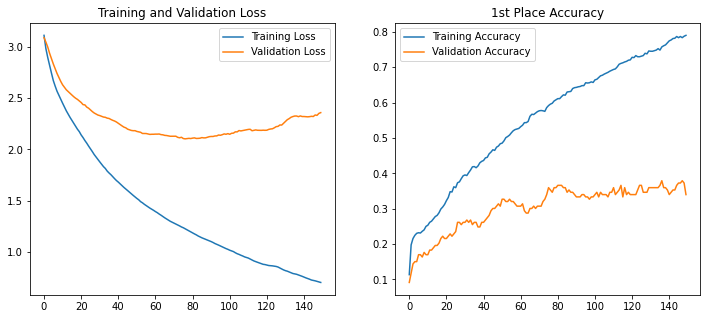

In [80]:
model_path = MODELS_PATH + 'binary_pos_3copies0to10_twolayers/'
model = BinaryTwoLayers()
lr = 0.001

load = False
epochs = 150
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## binary_pos_3copies0to10_threelayersdropout0.5

New model created


Training Progress:   0%|          | 0/150 [00:00<?, ?epoch/s]

Epoch 150/150 - Train Acc: 0.30 | Val Acc: 0.20: 100%|██████████| 150/150 [00:06<00:00, 24.14epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.190229,3.135882,0.035131,0.052288
1,2,3.124717,3.096886,0.066993,0.058824
2,3,3.094481,3.085052,0.103758,0.058824
3,4,3.069360,3.066233,0.105392,0.078431
4,5,3.063267,3.052753,0.111928,0.130719
...,...,...,...,...,...
145,146,2.298612,2.535722,0.310458,0.215686
146,147,2.311080,2.546253,0.303105,0.215686
147,148,2.344493,2.542919,0.293301,0.235294
148,149,2.350144,2.526538,0.295752,0.215686


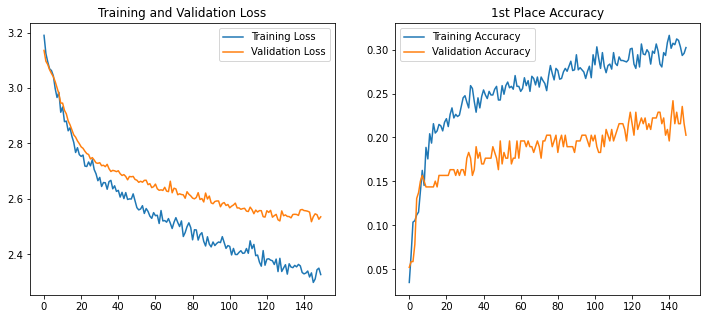

In [82]:
model_path = MODELS_PATH + 'binary_pos_3copies0to10_threelayersdropout0.5/'
model = BinaryThreeLayersDropout(dropout_rate=0.5)
lr = 0.001

load = False
epochs = 150
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  90%|█████████ | 450/500 [00:00<?, ?epoch/s]

Epoch 500/500 - Train Acc: 0.38 | Val Acc: 0.24: 100%|██████████| 500/500 [00:02<00:00, 24.06epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.190229,3.135882,0.035131,0.052288
1,2,3.124717,3.096886,0.066993,0.058824
2,3,3.094481,3.085052,0.103758,0.058824
3,4,3.069360,3.066233,0.105392,0.078431
4,5,3.063267,3.052753,0.111928,0.130719
...,...,...,...,...,...
495,496,2.062032,2.696556,0.384804,0.267974
496,497,1.942140,2.801868,0.383170,0.300654
497,498,2.021759,2.679386,0.370098,0.281046
498,499,1.978399,2.771067,0.387255,0.267974


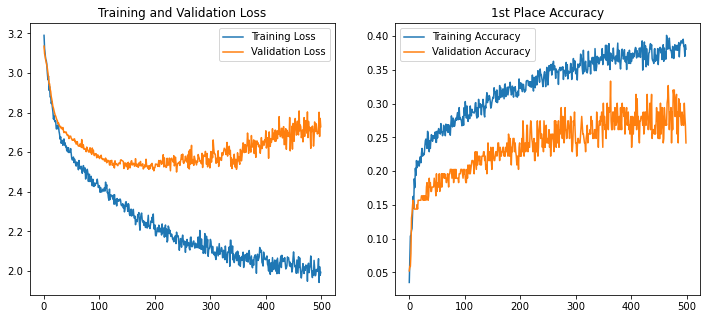

In [85]:
load = True
epochs = 50
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## binary_pos_3copies0to10_threelayersdropout0.2lr0.0001

New model created


Epoch 150/150 - Train Acc: 0.27 | Val Acc: 0.20: 100%|██████████| 150/150 [00:06<00:00, 24.25epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.184587,3.168477,0.018791,0.032680
1,2,3.176894,3.163647,0.022059,0.032680
2,3,3.169545,3.158494,0.023693,0.032680
3,4,3.161766,3.152315,0.035131,0.032680
4,5,3.154028,3.145761,0.045752,0.052288
...,...,...,...,...,...
145,146,2.421713,2.593155,0.270425,0.209150
146,147,2.421704,2.592162,0.277778,0.209150
147,148,2.425535,2.590658,0.267974,0.209150
148,149,2.442797,2.591762,0.274510,0.202614


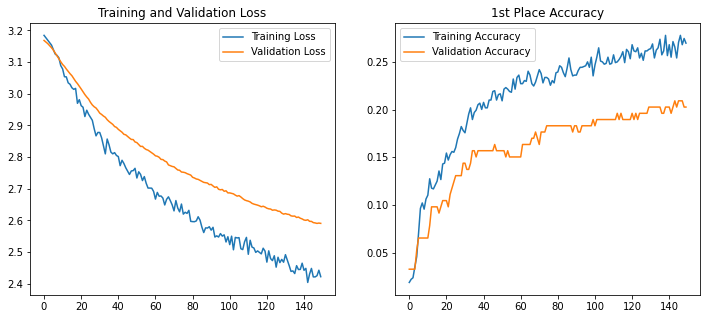

In [86]:
model_path = MODELS_PATH + 'binary_pos_3copies0to10_threelayersdropout0.2lr0.0001/'
model = BinaryThreeLayersDropout(dropout_rate=0.2)
lr = 0.0001

load = False
epochs = 150
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  80%|████████  | 1000/1250 [00:00<?, ?epoch/s]

Epoch 1250/1250 - Train Acc: 0.60 | Val Acc: 0.31: 100%|██████████| 1250/1250 [00:10<00:00, 23.82epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.184587,3.168477,0.018791,0.032680
1,2,3.176894,3.163647,0.022059,0.032680
2,3,3.169545,3.158494,0.023693,0.032680
3,4,3.161766,3.152315,0.035131,0.032680
4,5,3.154028,3.145761,0.045752,0.052288
...,...,...,...,...,...
1245,1246,1.211694,2.301703,0.610294,0.333333
1246,1247,1.267261,2.306696,0.582516,0.320261
1247,1248,1.307697,2.315764,0.578431,0.326797
1248,1249,1.231245,2.293607,0.589869,0.320261


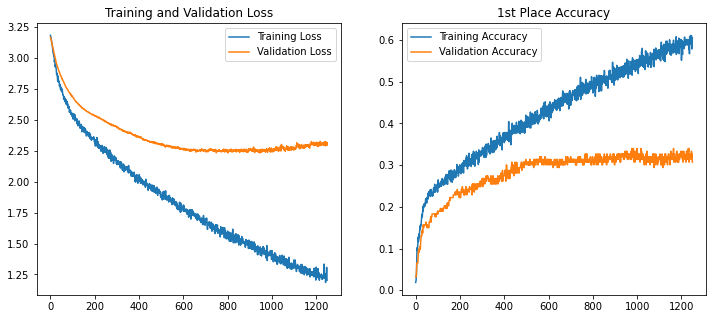

In [91]:
load = True
epochs = 250
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## binary_pos_3copies0to10_threelayersdropout0.5lr0.0001

New model created


Epoch 1000/1000 - Train Acc: 0.37 | Val Acc: 0.31: 100%|██████████| 1000/1000 [00:41<00:00, 24.15epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.197299,3.188102,0.031863,0.039216
1,2,3.193619,3.185779,0.040033,0.039216
2,3,3.191641,3.183868,0.040033,0.039216
3,4,3.185442,3.181857,0.044118,0.039216
4,5,3.181246,3.179758,0.060458,0.039216
...,...,...,...,...,...
995,996,2.074522,2.415755,0.367647,0.313725
996,997,2.107357,2.414996,0.343137,0.307190
997,998,2.106017,2.420000,0.363562,0.300654
998,999,2.031427,2.412121,0.378268,0.300654


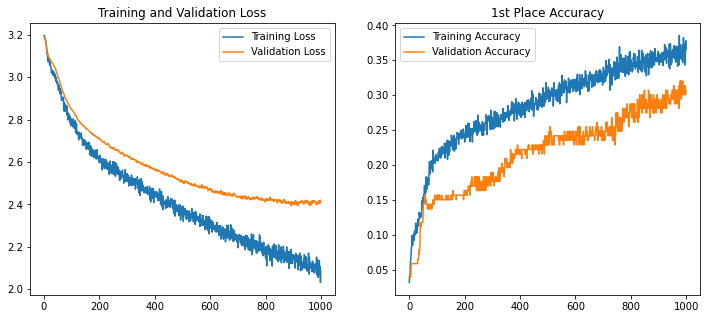

In [93]:
model_path = MODELS_PATH + 'binary_pos_3copies0to10_threelayersdropout0.5lr0.0001/'
model = BinaryThreeLayersDropout(dropout_rate=0.5)
lr = 0.0001

load = False
epochs = 1000
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  88%|████████▊ | 1750/2000 [00:00<?, ?epoch/s]

Epoch 2000/2000 - Train Acc: 0.44 | Val Acc: 0.36: 100%|██████████| 2000/2000 [00:10<00:00, 23.95epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.197299,3.188102,0.031863,0.039216
1,2,3.193619,3.185779,0.040033,0.039216
2,3,3.191641,3.183868,0.040033,0.039216
3,4,3.185442,3.181857,0.044118,0.039216
4,5,3.181246,3.179758,0.060458,0.039216
...,...,...,...,...,...
1995,1996,1.739857,2.454391,0.443627,0.346405
1996,1997,1.773573,2.433944,0.455882,0.359477
1997,1998,1.743121,2.436790,0.453431,0.346405
1998,1999,1.745521,2.436253,0.468954,0.359477


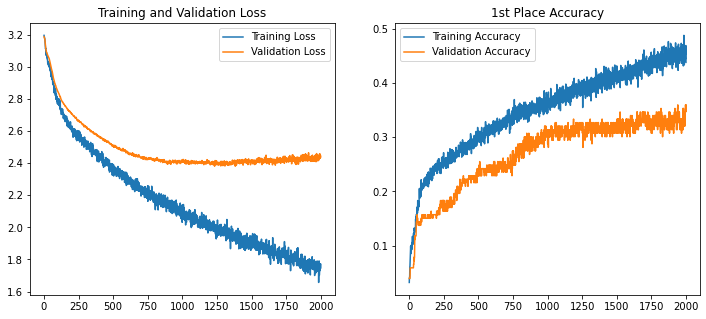

In [97]:
load = True
epochs = 250
train_singleoutput_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

In [54]:
pd.set_option('display.max_columns', None)

display(y_train.head(3))

,driver1_y,driver2_y,driver3_y,driver4_y,driver5_y,driver6_y,driver7_y,driver8_y,driver9_y,driver10_y,driver11_y,driver12_y,driver13_y,driver14_y,driver15_y,driver16_y,driver17_y,driver18_y,driver19_y,driver20_y,driver21_y,driver22_y,driver23_y,driver24_y
0,1.0,0.64,0.08,0.52,1.00,0.44,0.60,0.40,0.12,1.0,0.56,0.16,1.00,0.32,0.24,0.04,0.68,1.0,1.0,0.28,0.20,0.36,1.00,0.48
1,1.0,0.36,0.44,0.68,0.52,0.24,0.32,0.12,1.00,1.0,0.40,1.00,0.56,0.16,0.48,0.64,0.28,1.0,1.0,1.00,0.04,0.20,0.08,0.60
2,1.0,0.08,1.00,0.16,0.36,0.48,0.28,0.24,0.12,0.2,0.44,1.00,1.00,1.00,0.04,0.32,1.00,1.0,1.0,0.60,1.00,0.52,0.56,0.40
